# Homework 2: Linear Regression

**Due date**: September 27, Wednesday by 11:59pm


## **Question 1:** Weighted Ridge regression derivation (10pts)

**Throughout the following, please adhere to the following definitions**

$
n = number\ of\ samples \\
d = number\ of\ features \\
$

$
X = samples \in \mathcal{R}^{n*d}\\
y = labels \in \mathcal{R}^n \\
w = weight\ vector \in \mathcal{R}^d
$

Here we are assuming that the data has already been padded with an extra feature to account for the bias.  In class, we have derived the closed form solution for OLS Regression.  We can write this as follows:

$
loss = \sum_{i=1}^{n}(y_i - \sum_{j=1}^{d}X_{ij}w_j)^2
$
<br>


The optimal value for the parameter $\textbf{w}$ is given by

$
\textbf{w*} = (\textbf{X}^T \textbf{X})^{-1}\ \textbf{X}^T \textbf{y} \\
$

To control the variance of the parameters and help with overfitting, weighted ridge regression minimizes a weighted sum of least squares criterion augmented with a regularization parameter $\lambda$, as shown below:
<br>

$
loss = \sum_{i=1}^{n}\alpha_i(y_i - \sum_{j=1}^{d}X_{ij}w_j-b)^2 + \lambda ||\textbf{w}||^2
$

<br>
The degree to which this regularization impacts the loss function is controlled by the $\lambda$ parameter and $\alpha_i$ is the ith diagonal element of an $n$ x $n$ diagonal weight matrix $A$.  We assume these weights are given to us.




Derive the closed form solution of weighted ridge regression using the same workflow used in class to derive OLS.

**Hint:** You are trying to minimize the loss w.r.t. to $w$   


__Your answer:__


## **Question 2:** More Regularization (5 pts)

a) Explain the purpose of a regularizer.

b) Give another example of a regularizer.

**Your answer:**

a)

b)

## **Question 3:**  Linear Least Square Regression (15 pts)

Consider the following training set _$D = {\{(x_1,y_1) = (0,0),(x_2,y_2) = (1,7),(x_3,y_3) = (2,3)\}}$_. Compute the following by hand:



  a. __Ordinary Least Square__: $(w_{OLS}, b_{OLS}) = argmin_{w,b} \sum_{i=1}^{3}(y_i - wx_{i}-b)^2$

  b. __weighted linear Regression__: $(w_{WLS}, b_{WLS}) = argmin_{w,b} \sum_{i=1}^{3}\alpha_i(y_i - wx_{i}-b)^2$ where $\alpha = [2, 1, 2]$
  
  c. __Polynomial Least Square__(Calculator allowed 🤓): $(w_{PLS}, b_{PLS}) = argmin_{w,b} \sum_{i=1}^{3}(y_i - w^{T}z_{i}-b)^2$ where $z_i = ((x_i)^2,(x_i)^3)$ and $ w = (w_2,w_3)^T. $

__Hint__: if $ A = \left(\begin{array}{cc} a & b\\c & d\end{array}\right) $ then
$ A^{-1} = \frac 1{det(A)} \left(\begin{array}{cc} d & -b\\-c & a\end{array}\right) $






__Your answer:__


a.

b.

c.



## **Question 4:** Linear Regression Implementation -> OLS & Ridg (35 pts)

Throughout this question we will be concerned with implementing Linear regression and Ridge regression and verifying our results against sklearn's inbuilt functions.

To do this, we will be using a very simple and small dataset containing 150 samples and only 1 feature.  

This will enable us to plot and visualize everything along the way.


### Data processing and Visualization

In [1]:
import numpy as np
from sklearn.datasets import make_regression, make_blobs

X, y, coefficients = make_regression(
    n_samples=150,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=15,
    coef=True,
    random_state=14
)


print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(150, 1)
y shape:	(150,)


Create a scatter plot of all datapoints to see our data

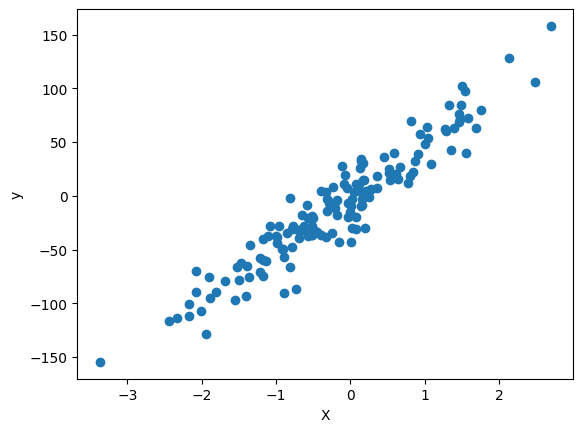

In [2]:
from matplotlib import pyplot as plt

#ADD CODE HERE#
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Attach a vector of ones onto **X** to account for the bias value

In [3]:
#ADD CODE HERE#
# Create a vector of ones with the same number of rows as X
bias_vector = np.ones((X.shape[0], 1))

# # Attach the bias vector to X using np.hstack
X = np.hstack((bias_vector, X))

print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(150, 2)
y shape:	(150,)


Using **train_test_split** from sklearn, seperate the data using a 60, 20, 20 split.

* Make sure to shuffle the dataset using a **random_state** of 42

**Hint:**

* This can be done easily with 2 calls to **train_test_split**.

* The first call will split the data into train/test, and the second will split the train data into train/val

In [4]:
from sklearn.model_selection import train_test_split

#ADD CODE HERE#
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.40, random_state=42,shuffle=True)

xtest, xval, ytest, yval = train_test_split(xtest, ytest, test_size=0.50, random_state=42,shuffle=True)


print("xtrain shape:", xtrain.shape, sep='\t')
print("xval shape:", xval.shape, sep='\t')
print("xtest shape:", xtest.shape, '\n', sep='\t')

print("ytrain shape:", ytrain.shape, sep='\t')
print("yval shape:", yval.shape, sep='\t')
print("ytest shape:", ytest.shape, sep='\t')

xtrain shape:	(90, 2)
xval shape:	(30, 2)
xtest shape:	(30, 2)	

ytrain shape:	(90,)
yval shape:	(30,)
ytest shape:	(30,)


### OLS

Define a function *get_loss* that takes the inputs X, y, and W and calculates the loss required (MSE). Its skeleton is shown below. Note: Mean Squared Error (MSE): average of loss over the data points. (See https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/ for more details)

For full credit, create a vectorized implementation (no for loops).

In [5]:
def get_loss(X, y, W):

    #ADD CODE HERE#
    
    # Calculate predictions
    predictions = X.dot(W)

    # Calculate squared errors
    squared_errors = (predictions - y) ** 2

    # Calculate the MSE
    mse = np.mean(squared_errors)

    return mse

Using the derivation done in class, implement the closed form solution for ordinary least squares.

Do this by defining a function *OLS* that takes the inputs $\mathbf{X}$ and $\mathbf{y}$ and returns $\mathbf{w}$. Its skeleton is shown below.

For full credit, do not use the inverse function, as it is less numerically stable.

**Hint:** you may want to look into *numpy.linalg.solve*

In [6]:
def OLS(X, y):

    #ADD CODE HERE#
    
    # Calculate X^T * X and X^T * y
    XTX = X.T.dot(X)
    XTy = X.T.dot(y)

    # Solve for w using the equation X^T * X * w = X^T * y
    w = np.linalg.solve(XTX, XTy)
    
    return w

W_ols = OLS(xtrain, ytrain)
print("W_ols:", W_ols)

W_ols: [-1.75464619 48.23236884]


Create the following plots:
* a scatter plot of the training data overlayed by the OLS solution
* a scatter plot of the testing data overlayed by the OLS solution

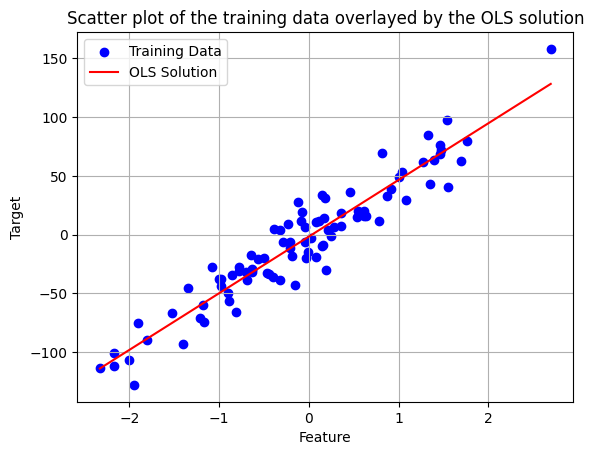

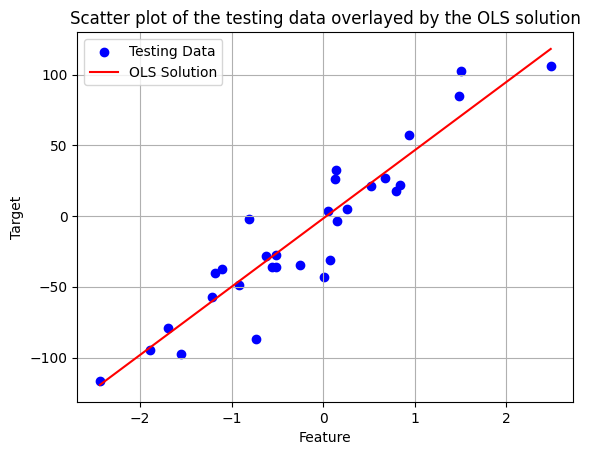

In [7]:
from matplotlib import pyplot as plt

#ADD CODE HERE#
plt.scatter(xtrain[:,1], ytrain, label='Training Data', color='blue')

# Overlay the OLS solution (a linear line)
X_range = np.linspace(min(xtrain[:, 1]), max(xtrain[:, 1]), 100)
y_ols = W_ols[0] + W_ols[1] * X_range
plt.plot(X_range, y_ols, label='OLS Solution', color='red')

# Add labels and legend
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Show the plot
plt.title('Scatter plot of the training data overlayed by the OLS solution')
plt.grid(True)
plt.show()

# Testing
plt.scatter(xtest[:,1], ytest, label='Testing Data', color='blue')

# Overlay the OLS solution (a linear line)
X_range = np.linspace(min(xtest[:, 1]), max(xtest[:, 1]), 100)
y_ols = W_ols[0] + W_ols[1] * X_range
plt.plot(X_range, y_ols, label='OLS Solution', color='red')

# Add labels and legend
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Show the plot
plt.title('Scatter plot of the testing data overlayed by the OLS solution')
plt.grid(True)
plt.show()

Compute training loss and testing loss using the *get_loss* function you have previously defined. Is the training or testing loss greater? What happens when we increase the sample size?

In [8]:
loss_train = get_loss(xtrain, ytrain, W_ols)
loss_test = get_loss(xtest, ytest, W_ols)

print("Training Loss:", loss_train)
print("Testing Loss:", loss_test)

Training Loss: 253.31662638193387
Testing Loss: 399.36871068752214


**Answer:**
- Testing loss is greater
- if we increase the sample size,it can reduce variance in Estimation, decrease risk of overfitting, more accurate testing loss and improve generalization

### Ridge

Define a function *get_ridge_loss* that takes the inputs X, y, W, and $\lambda$ and calculates the loss required (MSE with L2 regularization).

Its skeleton is shown below.

For full credit, create a vectorized implementation (no for loops).

In [9]:
def get_ridge_loss(X, y, W, lmda):
    #ADD CODE HERE#
    
    # Calculate predictions
    predictions = X.dot(W)

    # Calculate squared errors
    squared_errors = (predictions - y) ** 2

    # Calculate the MSE loss
    mse_loss = np.mean(squared_errors)

    # Calculate the L2 regularization term
    l2_regularization = lmda * np.sum(W ** 2)

    # Calculate the total loss (MSE loss + L2 regularization)
    total_loss = mse_loss + l2_regularization
    return total_loss

Using your derivation from question 1, implement the closed form solution for ridge regression.

Do this by defining a function *ridge* that takes the inputs $\mathbf{X}$, $\mathbf{y}$, and $\lambda$ and returns $\mathbf{w}$. Its skeleton is shown below. Set $\lambda = 0.1$

For full credit, do not use the inverse function

In [10]:
def ridge(X, y, lmda):

    #ADD CODE HERE#
    
    n_features = X.shape[1]
    
    # Calculate X^T * X and X^T * y
    XTX = X.T.dot(X)
    XTy = X.T.dot(y)

    # Calculate the L2 regularization term
    l2_regularization = lmda * np.identity(n_features)

    # Solve for w using the equation (X^T * X + λI) * w = X^T * y
    W_ridge = np.linalg.solve(XTX + l2_regularization, XTy)

    return W_ridge

lmda = 0.1
W_ridge = ridge(xtrain, ytrain, lmda)
print("W_ridge:", W_ridge)

W_ridge: [-1.75766689 48.18029838]


Create the following plots:
* a scatter plot of the training data overlayed by the ridge solution
* a scatter plot of the testing data overlayed by the ridge solution

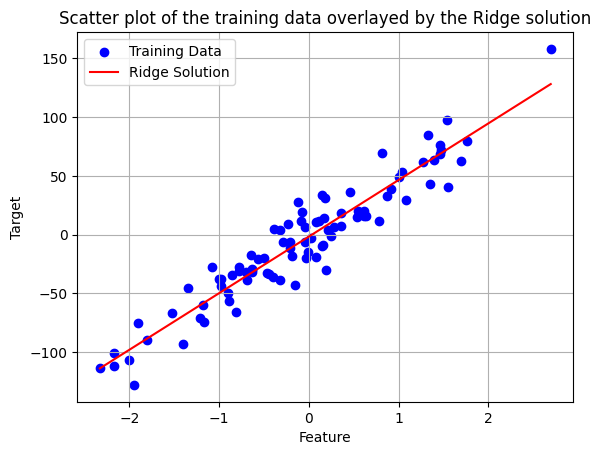

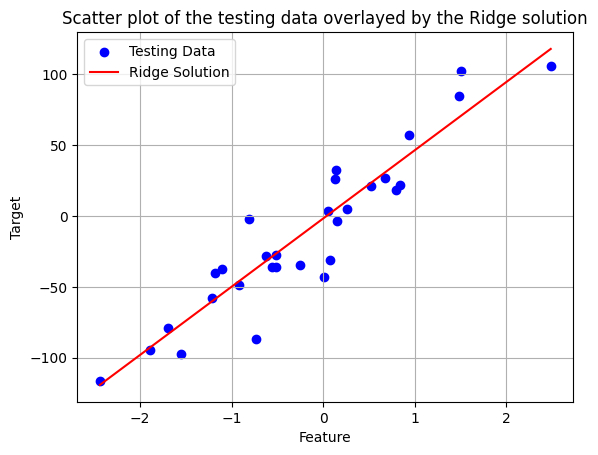

In [11]:
from matplotlib import pyplot as plt

#ADD CODE HERE#
plt.scatter(xtrain[:,1], ytrain, label='Training Data', color='blue')

# Overlay the OLS solution (a linear line)
X_range = np.linspace(min(xtrain[:, 1]), max(xtrain[:, 1]), 100)
y_ols = W_ridge[0] + W_ridge[1] * X_range
plt.plot(X_range, y_ols, label='Ridge Solution', color='red')

# Add labels and legend
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Show the plot
plt.title('Scatter plot of the training data overlayed by the Ridge solution')
plt.grid(True)
plt.show()

# Testing
plt.scatter(xtest[:,1], ytest, label='Testing Data', color='blue')

# Overlay the OLS solution (a linear line)
X_range = np.linspace(min(xtest[:, 1]), max(xtest[:, 1]), 100)
y_ols = W_ridge[0] + W_ridge[1] * X_range
plt.plot(X_range, y_ols, label='Ridge Solution', color='red')

# Add labels and legend
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Show the plot
plt.title('Scatter plot of the testing data overlayed by the Ridge solution')
plt.grid(True)
plt.show()

Compute training loss and testing loss using the *get_ridge_loss* function you have previously defined. Why is the loss greater in ridge regression vs OLS?

In [12]:
loss_train = get_ridge_loss(xtrain, ytrain, W_ridge,lmda)
loss_test = get_ridge_loss(xtest, ytest, W_ridge,lmda)

print("Training Loss:", loss_train)
print("Testing Loss:", loss_test)

Training Loss: 485.7624624926684
Testing Loss: 631.86114943236


**Answer:**
Ridge regression introduces a regularization term, which is the L2-norm (Euclidean norm) of the coefficients vector, scaled by a regularization parameter (λ or alpha). This regularization term encourages the coefficients to be small, which helps prevent overfitting. As a result, the coefficients are penalized for being too large, even if they might improve the fit to the training data. This penalty term increases the overall loss


### Verifying Results

Use sklearn's pre-built OLS model on our dataset and verify that your implementation matches its result

Do this by printing $w_{ols}$ from your implementation and sklearn's implementation

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Previous result
W_ols = W_ols

# Sklearn result

# Create a LinearRegression model
W_ols_sklearn = LinearRegression()

# Fit the model to the training data
W_ols_sklearn.fit(xtrain, ytrain)

print("W_ols_sklearn", W_ols_sklearn.coef_[-1], W_ols_sklearn.intercept_)
print("W_ols my implementation", W_ols[1],W_ols[0])

W_ols_sklearn 48.23236883529895 -1.7546461931913235
W_ols my implementation 48.232368835298914 -1.7546461931913275


Use scklearn's pre-built Ridge model on our dataset and verify that your implementation matches its result.

Use the same $\lambda = 0.1$ from the previous section

Do this by printing $w_{ridge}$ from your implementation and sklearn's implementation

In [14]:
from sklearn.linear_model import Ridge

# Previous result
W_ridge = W_ridge

# Sklearn result
W_ridge_sklearn = Ridge(alpha=0.1)
W_ridge_sklearn.fit(xtrain, ytrain)

print("W_ridge_sklearn", W_ridge_sklearn.coef_[-1], W_ridge_sklearn.intercept_)
print("W_ridge my implementation", W_ridge[1],W_ridge[0])

W_ridge_sklearn 48.18011649853973 -1.759637225568139
W_ridge my implementation 48.18029837997257 -1.7576668894289795


## **Question 5:** Hyperparameter Tuning (25 pts)

Throughout this question, we will be interested in tuning the hyper parameter $\lambda$ in ridge regression. And showing ridge's impact vs regular OLS.

To do this, we will need a more complex dataset. One which has many redundant, non-informative dimensions. So we will be defining a new synthetic dataset using the code below.

Our dataset will have 100 samples, and 1500 features.

In [15]:
import numpy as np
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=100,
    n_features=1500,
    n_informative=2,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=10
)
y = abs(y)
print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(100, 1500)
y shape:	(100,)


Attach a vector of ones onto **X** to account for the bias value

In [16]:
#ADD CODE HERE#
bias_vector = np.ones((X.shape[0], 1))

# # Attach the bias vector to X using np.hstack
X = np.hstack((bias_vector, X))

print("X shape:", X.shape, sep='\t')
print("y shape:", y.shape, sep='\t')

X shape:	(100, 1501)
y shape:	(100,)


Using **train_test_split** from sklearn, seperate the data using a 60, 20, 20 split.

* Make sure to shuffle the dataset using a **random_state** of 42

**Hint:**

* This can be done easily with 2 calls to **train_test_split**.

* The first call will split the data into train/test, and the second will split the train data into train/val


In [17]:
from sklearn.model_selection import train_test_split

#ADD CODE HERE#
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.40, random_state=42,shuffle=True)

xtest, xval, ytest, yval = train_test_split(xtest, ytest, test_size=0.50, random_state=42,shuffle=True)

print("xtrain shape:", xtrain.shape, sep='\t')
print("xval shape:", xval.shape, sep='\t')
print("xtest shape:", xtest.shape, '\n', sep='\t')

print("ytrain shape:", ytrain.shape, sep='\t')
print("yval shape:", yval.shape, sep='\t')
print("ytest shape:", ytest.shape, sep='\t')

xtrain shape:	(60, 1501)
xval shape:	(20, 1501)
xtest shape:	(20, 1501)	

ytrain shape:	(60,)
yval shape:	(20,)
ytest shape:	(20,)


### OLS

Using your implementation from the previous question,
get the OLS solution on this dataset.

In [18]:
#ADD CODE HERE#
W_ols = OLS(xtrain, ytrain)
print("W_ols:", W_ols[:10])    # For the sake of cleanliness we will only print first 10 coefficients

W_ols: [   2.64402205  228.03758399 -254.68133561   68.88420934   73.21025755
  196.89248356  217.64469903  102.4717111  -122.18875166 -223.72106856]


Using your loss function from the previous question, obtain the train, val, and test losses of OLS.

Is this solution overfitting the data? Explain.

In [19]:
loss_train = get_loss(xtrain, ytrain, W_ols)
loss_val = get_loss(xval, yval, W_ols)
loss_test = get_loss(xtest, ytest, W_ols)

print("Training Loss:", loss_train)
print("Validation Loss:", loss_val)
print("Testing Loss:", loss_test)

Training Loss: 1.6615499146905716e-23
Validation Loss: 11563384.869641319
Testing Loss: 22233464.38850886


**Answer:** Yes, overfitting the data. The model appears to have memorized the training data (low training loss) but fails to generalize to new data (high validation and testing losses). Overfitting occurs when a model is too complex relative to the amount of training data, and it starts to capture noise in the data rather than true patterns.



### Ridge

Using your implementation from the previous question, and your validations data, tune the $\lambda$ parameter of ridge regression.

Do this by creating a loop that varies $\lambda$ from 10e-20 to 10e-1 in factors of 10.

On each iteration
* calculate W_ridge using your previous implementation
* calculate training and validation loss
* store the training loss, validation loss, and $\lambda$ value. These will be needed for the coming plots.

In [20]:
train_loss_arr = []
val_loss_arr = []
lmdas = []

#ADD CODE HERE#
lambda_values = [10**(-i) for i in range(20)]
for lmda in lambda_values:
    W_ridge = ridge(xtrain, ytrain, lmda)
    loss_train = get_ridge_loss(xtrain, ytrain, W_ridge,lmda)
    loss_val = get_ridge_loss(xval, yval, W_ridge,lmda)
    
    train_loss_arr.append(loss_train)
    val_loss_arr.append(loss_val)
    lmdas.append(lmda)

Create a plot of the losses as a function of lamda

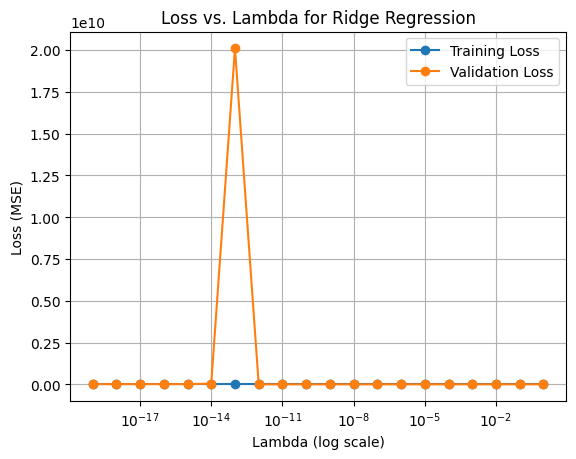

In [21]:
from matplotlib import pyplot as plt

#ADD CODE HERE#
# plt.figure(figsize=(10, 6))
plt.semilogx(lmdas, train_loss_arr, label='Training Loss', marker='o', linestyle='-')
plt.semilogx(lmdas, val_loss_arr, label='Validation Loss', marker='o', linestyle='-')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs. Lambda for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

Identify the best lambda $\lambda^*$, and train your final classifier $W^*_{ridge}$ on both the training and the validation data together.

In [22]:
# Identifying lambda_star
min_idx = np.array(val_loss_arr).argmin()
lmda_star = lmdas[min_idx]

# Creating final xtrain and ytrain
xtrain_final = np.concatenate((xtrain,xval))
ytrain_final = np.concatenate((ytrain,yval))

# Calculating W_ridge_star
W_ridge_star = ridge(xtrain_final, ytrain_final, lmda)

print("lmda_star:", lmda_star)
print("W_ridge_star:", W_ridge_star[:10]) # For the sake of cleanliness we will only print first 10 coefficients

lmda_star: 1e-12
W_ridge_star: [-153.5258799    54.7293027   675.2150682  -409.8439781  -237.11620994
  -37.10667793 -291.47353185   73.86920955 -219.1537101   265.32745813]


Using your loss function *get_ridge_loss* from the previous question, obtain the train, val, and test losses of $W_{ridge}^*$. Then answer the following questions:
* Are we overfitting the dataset? Explain.
* How are we performing compared to OLS. Explain.

In [23]:
loss_train = get_loss(xtrain, ytrain, W_ridge_star)
loss_val = get_loss(xval, yval, W_ridge_star)
loss_test = get_loss(xtest, ytest, W_ridge_star)
print("Training Loss:", loss_train)
print("Validation Loss:", loss_val)
print("Testing Loss:", loss_test)

Training Loss: 3.4556732266851084e-23
Validation Loss: 3.6546828433370315e-23
Testing Loss: 69136908.91908908


**Answer:** The model is likely overfitting the dataset. The extremely low training and validation losses, along with the significantly higher testing loss, are clear signs of overfitting. The model has learned to fit the training data too closely, capturing noise and specific patterns that do not generalize well to new data. To address overfitting, we may need to consider techniques such as regularization, reducing model complexity, or obtaining more diverse training data.

Ridge Regression and OLS both fit the training data very well, but Ridge has a slight advantage in terms of validation loss, suggesting better generalization. However, when evaluated on the testing data, Ridge Regression performs worse than OLS, indicating that the regularization in Ridge might have been too strong for this particular dataset.